In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
import matplotlib.pyplot as plt
import glob as glob

In [2]:
image_sie=[224,224,3]
# 224 224 are the pixel and 3 chanels bcoz its RGB images
train_path=r"F:\AI & ML\CNN\Datasets\Train"
valid_path=r"F:\AI & ML\CNN\Datasets\Test"

In [3]:
resnet=ResNet50(include_top=False,input_shape=image_sie,weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [4]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
# First and last layers are not added

In [6]:
for layer in resnet.layers:
    layer.trainable= False
# Do not train the existing weights

In [8]:
# Globe function is tells us how many folders are their
import glob
folders=glob.glob('F:/AI & ML/CNN/Datasets/Train/*')

In [9]:
folders

['F:/AI & ML/CNN/Datasets/Train\\audi',
 'F:/AI & ML/CNN/Datasets/Train\\lamborghini',
 'F:/AI & ML/CNN/Datasets/Train\\mercedes']

In [10]:
len(folders)

3

In [11]:
x = Flatten()(resnet.output)
# our layers - you can add more if you wan

In [12]:
prediction=Dense(len(folders),activation='softmax')(x)

In [13]:
model=Model(inputs=resnet.input,outputs=prediction)

In [14]:
# Above we just add the resent mdel ant flattern layer and give the classes of prediction

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,888,771 (91.13 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                horizontal_flip=True,
                                 shear_range=0.2,
                                zoom_range=0.2,
                                )

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                              )

Found 64 images belonging to 3 classes.


In [21]:
testing_set=test_datagen.flow_from_directory(valid_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical'
                                            )

Found 58 images belonging to 3 classes.


In [27]:
if training_set is not None and testing_set is not None:
    r = model.fit(
        training_set,
        validation_data=testing_set,
        epochs=50,
#         steps_per_epoch=len(training_set),
#         validation_steps=len(testing_set)
    )
else:
    print("Training set or test set is None. Please check the initialization.")

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 27s/step - accuracy: 0.3750 - loss: 4.5070 - val_accuracy: 0.1552 - val_loss: 7.6608
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 25s/step - accuracy: 0.3229 - loss: 6.1201 - val_accuracy: 0.5172 - val_loss: 4.5440
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 23s/step - accuracy: 0.3750 - loss: 4.9288 - val_accuracy: 0.5172 - val_loss: 3.2745
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 23s/step - accuracy: 0.4062 - loss: 2.9680 - val_accuracy: 0.3276 - val_loss: 3.3455
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 22s/step - accuracy: 0.4062 - loss: 2.4002 - val_accuracy: 0.3621 - val_loss: 5.6970
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 23s/step - accuracy: 0.5312 - loss: 3.2747 - val_accuracy: 0.2414 - val_loss: 4.9411
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 23s/step - accuracy: 0.5104 - loss: 2.9282 - val_accuracy: 0.4828 - val_loss: 1.3111
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 22s/step - accuracy: 0.6250 - loss: 1.1256 - val_accuracy: 0.5690 - val_loss: 2.3003


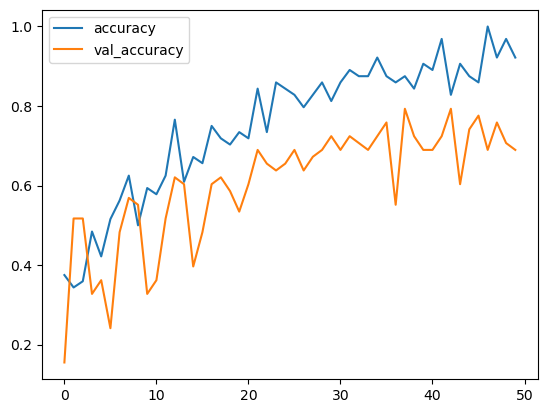

In [29]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

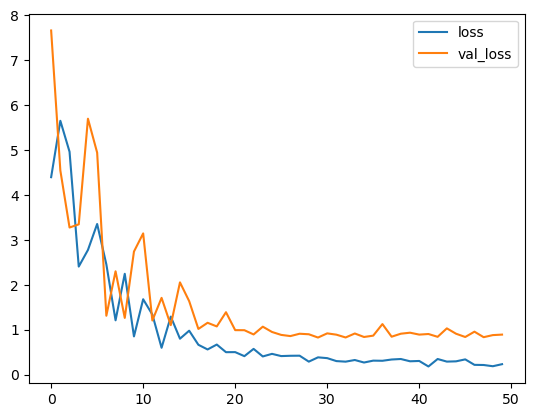

In [30]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [31]:
# save the model
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [32]:
y_pred=model.predict(testing_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 14s/step


In [33]:
y_pred
"""It shows the high probabilty of the 3 classes as per input data
ex:- o/p= 3 classes audi lambo mercedes i/p= 1 image given
 and get [2.63113715e-03, 9.40140307e-01, 5.72285391e-02]
 means proba of audi=2.63, lambo=9.4, merce=5.7
  and the o/p will be lambroghini
""" 

array([[2.63113715e-03, 9.40140307e-01, 5.72285391e-02],
       [6.02704298e-04, 9.88433182e-01, 1.09640667e-02],
       [5.92963723e-03, 3.27208668e-01, 6.66861713e-01],
       [2.91032884e-02, 8.97287786e-01, 7.36089274e-02],
       [1.07248932e-01, 8.52023184e-01, 4.07278985e-02],
       [1.95983076e-03, 6.41995549e-01, 3.56044620e-01],
       [7.32382387e-02, 5.86266160e-01, 3.40495586e-01],
       [7.48206556e-01, 1.46324322e-01, 1.05469152e-01],
       [9.37545747e-02, 6.66140318e-01, 2.40105033e-01],
       [5.75099409e-01, 1.48708865e-01, 2.76191741e-01],
       [5.58077311e-03, 3.23521733e-01, 6.70897484e-01],
       [2.86776703e-02, 2.93019891e-01, 6.78302407e-01],
       [4.74150062e-01, 2.54354298e-01, 2.71495521e-01],
       [1.07923165e-01, 4.25345898e-02, 8.49542260e-01],
       [6.67488500e-02, 6.73065409e-02, 8.65944624e-01],
       [2.75214221e-02, 1.16424449e-01, 8.56054127e-01],
       [2.91100554e-02, 1.31651992e-03, 9.69573438e-01],
       [2.87457615e-01, 2.68221

In [34]:
# To select the best from all the probability
y_pred=np.argmax(y_pred,axis=1)

In [35]:
y_pred
""" now this gives the index number
[2.63113715e-03, 9.40140307e-01, 5.72285391e-02] = index[1] is high
[6.02704298e-04, 9.88433182e-01, 1.09640667e-02] = index[1] is high
[5.92963723e-03, 3.27208668e-01, 6.66861713e-01] = index[2] is high
 as per result = array([1, 1, 2
"""

array([1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2], dtype=int64)

# Test the model

In [37]:
pred_model=load_model('model_resnet50.h5')

In [75]:
# Get the image for prediction
img=image.load_img(r'F:\AI & ML\CNN\Datasets\Train\mercedes\1.jpg',target_size=(224,224))

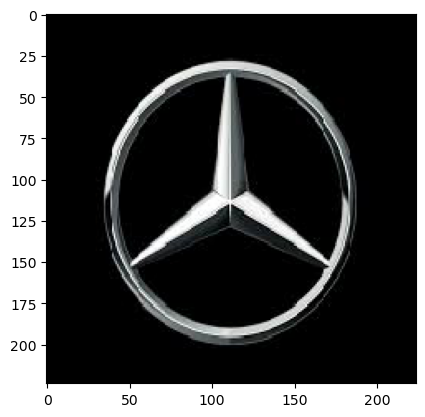

In [76]:
plt.imshow(img)
plt.show()

In [77]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [78]:
x.shape

(224, 224, 3)

In [79]:
x=x/255

In [80]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [81]:
# Reshape the image

In [82]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [83]:
test_pred=pred_model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


In [84]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


array([[1.2122478e-11, 9.4486042e-12, 1.0000000e+00]], dtype=float32)

In [86]:
a=np.argmax(test_pred,axis=1)
if a==0:
    print('Audi')
elif a==1:
    print('Lambo')
else:
    print('Mercedes')

Mercedes
